# Count time-based keyword frequency

# Load data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./preprocessed_news_218posts.csv',sep='|')

# filter data using tokens_rm_stopwords or content column

In [3]:
from datetime import datetime, timedelta

def filter_dataFrame(key, cond, cate,weeks):
    # end date: the date of the latest record of news
    end_date = df.date.max()
    print('latest date for dataset:', end_date)

    # start date
    start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks=weeks)).strftime('%Y-%m-%d')

    # proceed filtering
    if (cate == "全部") & (cond == 'and'):
        query_df = df[(df.date >= start_date) & (df.date <= end_date) & df.tokens_rm_stopwords.apply(
            lambda row: all((qk in row) for qk in key))]
    elif (cate == "全部") & (cond == 'or'):
        queryKey = '|'.join(key)
        query_df = df[(df['date'] >= start_date) & (df['date'] <= end_date) & df.tokens_rm_stopwords.str.contains(queryKey)]
    elif (cond == 'and'):
        query_df = df[(df.category == cate) & (df.date >= start_date) & (df.date <= end_date) & df.tokens_rm_stopwords.apply(
            lambda row: all((qk in row) for qk in key))]
    elif (cond == 'or'):
        queryKey = '|'.join(key)
        query_df = df[(df.category == cate) & (df['date'] >= start_date) & (df['date'] <= end_date) & df[
            'tokens_rm_stopwords'].str.contains(queryKey)]

    return query_df

## Now we can conveniently call those functions

In [4]:
user_keywords = ['台灣']
cond = 'and'
cate = '全部'
weeks = 4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)

latest date for dataset: 2022-09-30


In [5]:
len(df_query)

78

# time-based frequency

## Assign 1 (frequency value) to each news 

In [6]:
# done with one line:
query_freq = pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

In [7]:
query_freq

,date_index,freq
0,2022-09-29,1
1,2022-09-29,1
2,2022-09-29,1
3,2022-09-29,1
6,2022-09-29,1
...,...,...
197,2022-09-28,1
200,2022-09-29,1
201,2022-09-29,1
202,2022-09-29,1


## How to make it? Step by step

In [8]:
{'date_index':pd.to_datetime(df_query.date),'freq':[1 for _ in range(len(df_query))]}

{'date_index': 0     2022-09-29
 1     2022-09-29
 2     2022-09-29
 3     2022-09-29
 6     2022-09-29
          ...    
 197   2022-09-28
 200   2022-09-29
 201   2022-09-29
 202   2022-09-29
 217   2022-09-28
 Name: date, Length: 78, dtype: datetime64[ns],
 'freq': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [9]:
df_query.date

0      2022-09-29
1      2022-09-29
2      2022-09-29
3      2022-09-29
6      2022-09-29
          ...    
197    2022-09-28
200    2022-09-29
201    2022-09-29
202    2022-09-29
217    2022-09-28
Name: date, Length: 78, dtype: object

In [10]:
# convert to datetime format
pd.to_datetime( df_query.date )

0     2022-09-29
1     2022-09-29
2     2022-09-29
3     2022-09-29
6     2022-09-29
         ...    
197   2022-09-28
200   2022-09-29
201   2022-09-29
202   2022-09-29
217   2022-09-28
Name: date, Length: 78, dtype: datetime64[ns]

In [11]:
[1 for _ in range(len(df_query))]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [12]:
# dict format 
{'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]}

{'date_index': 0     2022-09-29
 1     2022-09-29
 2     2022-09-29
 3     2022-09-29
 6     2022-09-29
          ...    
 197   2022-09-28
 200   2022-09-29
 201   2022-09-29
 202   2022-09-29
 217   2022-09-28
 Name: date, Length: 78, dtype: datetime64[ns],
 'freq': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

In [13]:
# conver to dataframe
pd.DataFrame({'date_index':pd.to_datetime( df_query.date ),'freq':[1 for _ in range(len(df_query))]})

,date_index,freq
0,2022-09-29,1
1,2022-09-29,1
2,2022-09-29,1
3,2022-09-29,1
6,2022-09-29,1
...,...,...
197,2022-09-28,1
200,2022-09-29,1
201,2022-09-29,1
202,2022-09-29,1


## Daily frequency

### We use pd.Grouper(). It is very powerful.

In [14]:
query_freq.groupby(pd.Grouper(key = 'date_index', freq = 'D')).sum()

,freq
date_index,
2022-09-22,2
2022-09-23,0
2022-09-24,0
2022-09-25,0
2022-09-26,0
2022-09-27,2
2022-09-28,11
2022-09-29,63


In [15]:
pd.Grouper(key = 'date_index', freq = 'D')

TimeGrouper(key='date_index', freq=<Day>, axis=0, sort=True, closed='left', label='left', how='mean', convention='e', origin='start_day')

## Week-based frequency

In [16]:
query_freq.groupby(pd.Grouper(key = 'date_index', freq = 'W')).sum()

,freq
date_index,
2022-09-25,2
2022-10-02,76


## draw freqency line chart

In [17]:
# data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()[['freq']]
data = query_freq.groupby(pd.Grouper(key = 'date_index', freq = 'D')).sum()[['freq']]

In [18]:
data

,freq
date_index,
2022-09-22,2
2022-09-23,0
2022-09-24,0
2022-09-25,0
2022-09-26,0
2022-09-27,2
2022-09-28,11
2022-09-29,63


In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date_index'>

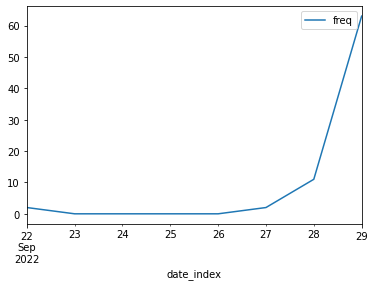

In [21]:
data.plot()

## Prepare data format for JavaScrip line chart on Django website

In [22]:
data.head(2)

,freq
date_index,
2022-09-22,2
2022-09-23,0


In [23]:
time_data = []
for i, date_idx in enumerate(data.index):
    row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
    time_data.append(row)

In [24]:
time_data

[{'x': '2022-09-22', 'y': 2},
 {'x': '2022-09-23', 'y': 0},
 {'x': '2022-09-24', 'y': 0},
 {'x': '2022-09-25', 'y': 0},
 {'x': '2022-09-26', 'y': 0},
 {'x': '2022-09-27', 'y': 2},
 {'x': '2022-09-28', 'y': 11},
 {'x': '2022-09-29', 'y': 63}]

# All-in-one function: Get time-based keyword frequency

In [25]:
def get_keyword_time_based_freq(df_query):
    date_samples = df_query.date
    query_freq = pd.DataFrame({'date_index':pd.to_datetime( date_samples ),'freq':[1 for _ in range(len(df_query))]})
    data = query_freq.groupby(pd.Grouper(key='date_index',freq='D')).sum()
    time_data = []
    for i, date_idx in enumerate(data.index):
        row = {'x':date_idx.strftime('%Y-%m-%d'),'y':int(data.iloc[i].freq)}
        time_data.append(row)
    return time_data

In [26]:
user_keywords = ['台灣']
cond ='and'
cate ='全部'
weeks = 4
df_query = filter_dataFrame(user_keywords, cond, cate, weeks)

latest date for dataset: 2022-09-30


In [27]:
result = get_keyword_time_based_freq(df_query)

In [28]:
result

[{'x': '2022-09-22', 'y': 2},
 {'x': '2022-09-23', 'y': 0},
 {'x': '2022-09-24', 'y': 0},
 {'x': '2022-09-25', 'y': 0},
 {'x': '2022-09-26', 'y': 0},
 {'x': '2022-09-27', 'y': 2},
 {'x': '2022-09-28', 'y': 11},
 {'x': '2022-09-29', 'y': 63}]

In [29]:
len(result)

8